# Feature Engineering
proses mendapatkan informasi yang lebih dari data tersebut

contoh 
- dari KTP bisa dapet domilisi tempat pembuatannya, tanggal lahir, usia, dan jenis kelamin
- bisa menggolongkan orang-orang dengan kategori yang sama

In [1]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

## import dataset dan concat dataframe
menggunakan dataset titanic dari kaggle

Berisi data dari semua orang yang ikut di dalam Kapal Titanic ratusan tahun yang lalu
- target variable/label yaitu Survived
- kolom/fitur ,digunakan untuk menentukkan apakah penumpang ini selamat/tidak dari kejadian dari kejadian titanic

model menggunakan data train untuk melatih data dan data test untuk menebak akurasi model

Buat Function concat_df untuk menggabungkan dua dataset/dataframe dari 2 csv menjadi satu dataframe

In [2]:
def concat_df(train_data, test_data):
	# Returns a concatenated df of training and test set
	return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

memasukan dataset dengan pd.read_csv() 

In [3]:
# Data train
df_train = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_train.csv')
# Data test
df_test = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_test.csv')
# gabungan dari kedua dataframe
df_all = concat_df(df_train, df_test)

menamai tiap dataframe dengan memberikan "name" untuk masing-masing dataframe 

In [4]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

list yang berisi kedua dataframe

In [5]:
dfs = [df_train, df_test]

### Penjelasan dari datast
- PassengerId, id pada row yang merupakan representasi tiap penumpangnya
- Survived, target yang akan diprediksi
    - 0 = Not Survived
    - 1 = Survived
- Pclass (Passenger Class), kategori level sosial ekonomi penumpang
    - 1 = Upper Class
    - 2 = Middle Class
    - 3 = Lower Class
- Name, Sex dan Age merupakan data self-explanatory
- SibSp, jumlah saudara dari penumpang
- Parch, jumlah Orang Tua dan anak dari penumpang
- Ticket, jumlah tiket penumpang
- Fare, tarif yang di kenakan kepada penumpang
- Cabin, nomor kabin penumpang
- Embarked, pelabuhan pemberangkatan
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [12]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418



kolom pada data training

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

kolom pada data testing

In [8]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### menemukan Missing value

In [13]:
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

terdapat data yang kosong di kolom 'Embarked, 'Age', dan 'Cabin'

melihat bagian awal dari data dengan 10 baris teratas

In [15]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Mencari korelasi dan melakukan data cleansing sederhana
Mencari tahu Korelasi antar fitur

In [18]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


Korelasi ditentukan dengan mendekati 
- nilai 1 untuk korelasi positive 
- nilai -1 untuk korelasi terbalik

hasil korelasi fitur dengan target
- Survived sangat besar korelasinya dengan Pclass dan Fare
- Age sangat berkaitan dengan Pclass, Sibling Spouse (SibSp), Parent Children (Parch)

dapat diasumsikan bahwa orang yang selamat orang dengan PClass atas dan Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan dan Fare (harga tentu saja berkaitan dengan Pclass (kelas penumpang) seorang penumpang

### Mengenali missing data dari kolom

In [19]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

# list yang berisi kedua dataframe
dfs = [df_train, df_test]

# untuk mengetahui jumlah missing value dari setiap kolom
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    # mengeluarkan hasil missing value
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




### Mencari nilai untuk missing value
mengisi nilai kosong (missing value) dengan nilai tengahnya (median) 

In [21]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
	for sex in ['female', 'male']:
		print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# isi missing values Age pake medians dari group jenis kelamin dan kelas penumpang (di groupby Sex ama Pclassnya)
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 26.0


### Mengisi nilai kosong
mengisi nilai yang hilang pada kolom Embarked dan Fare

mengisi Embarked dengan S karena kebanyakan orang berangkat dari S /Southampton

In [24]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

mengisi Fare dengan median karena Fare berkaitan dengan Pclass (kelas penumpang)

In [25]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

## Exploring Data
explorasi data pada fitur kategorikal dengan matplotlib 

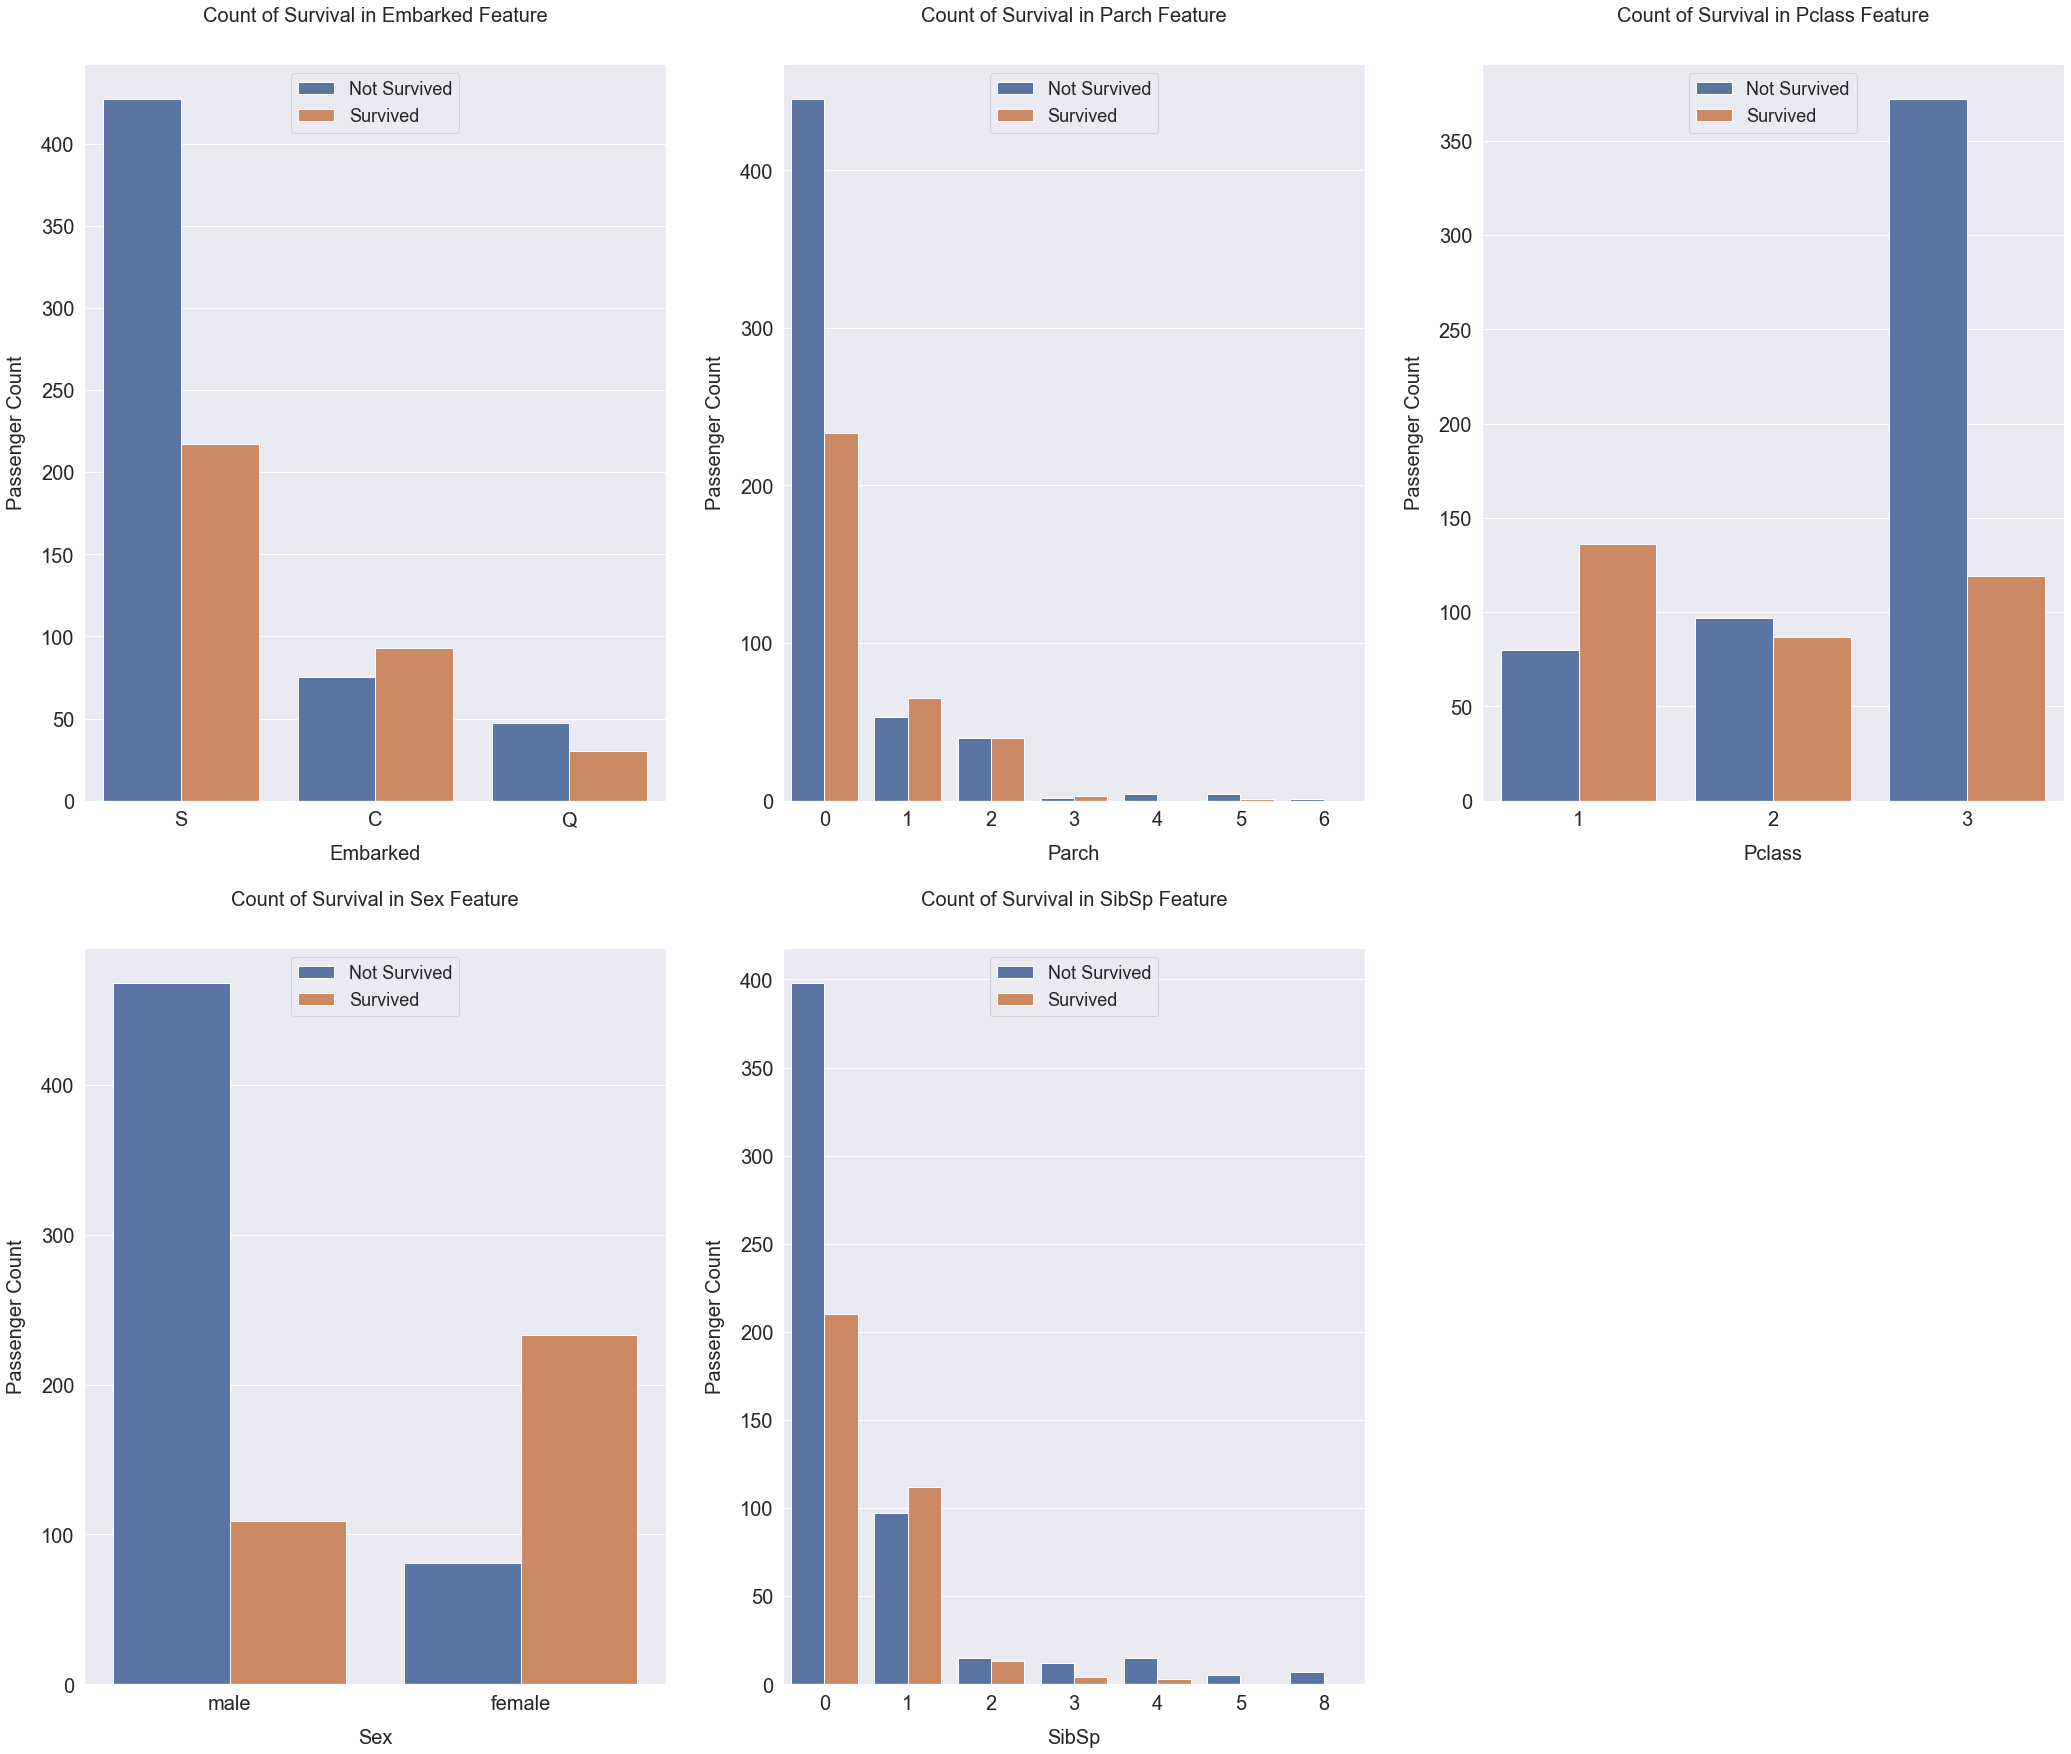

In [29]:
import matplotlib.pyplot as plt

cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

hasil explorasi
- penumpang yang berangkat dari Cherbourg lebih banyak yang selamat
- penumpang dari Southampton, hanya setengahnya yang selamat
- yang membawa hanya 1 Parent/Children, lebih banyak yang selamat
- orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi
- orang dengan Kelas Penumpang 3 hanya sedikit yang selamat
- yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar
- yang membawa 2 Sibling/Spouse kemungkinan selamatnya cukup kecil

Data Fare dan Age dibagi jadi beberapa Bin/Group

- minimal usia yang ada adalah 17 tahun dan yang tertua adalah 80 tahun, sehingga dibagi menjadi 13 kelompok quantile
- Fare termurah adalah 0 dan termahal adalah 512, sehingga dibagi menjadi 10 kelompok quantile

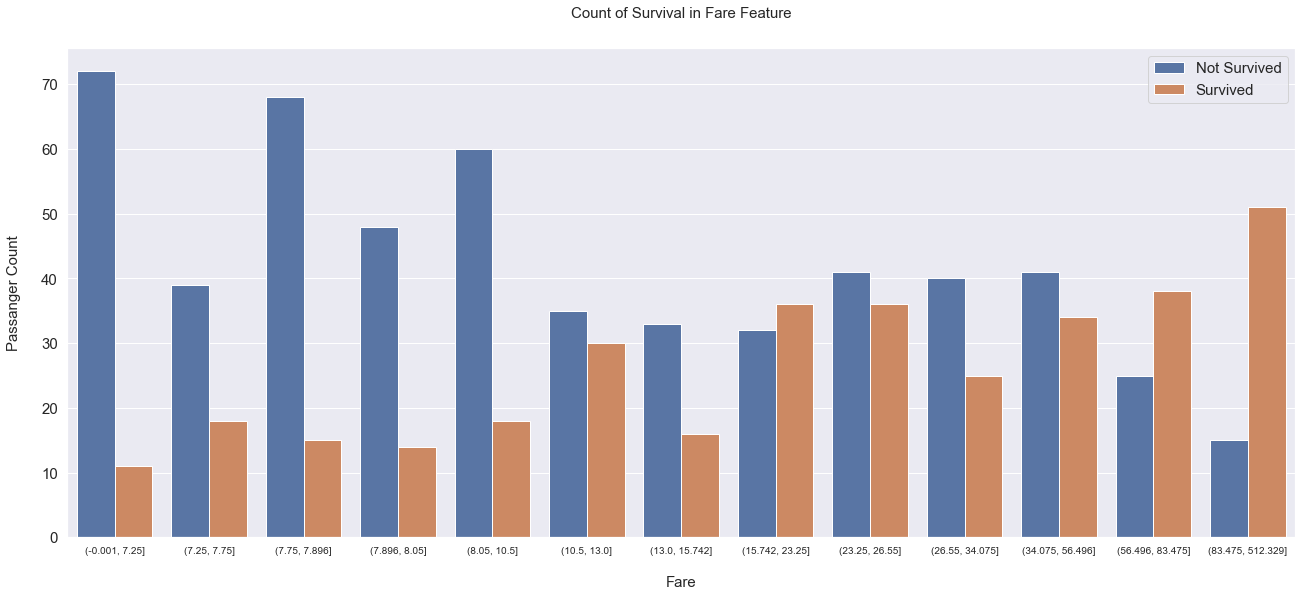

In [30]:
import matplotlib.pyplot as plt

# membagi Fare menjadi 13 bagian dengan fungsi qcut()
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

# menggambarkan plot group usia terhadap tingkat keselamatan
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passanger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas

namun terdapat banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742

## Feature Engineering
membuat fitur baru dari fitur yang sudah ada yang bertujuan menaikkan akurasi dari model machine learning

- Fitur Pertama, Family_Size
    - gabungan dari Parent, Children, Sibling, dan Spouse
    - kemudian tambahkan 1 dengan asumsi menghitung diri orang itu juga
- Fitur Kedua, gabungin Family_Size ama masing - masing group tergantung jumlahnya
    - Family Size 1 = Alone
    - Family Size 2, 3 dan 4 = Small
    - Family Size 5 dan 6 = Medium
    - Family Size 7, 8 dan 11 = Large

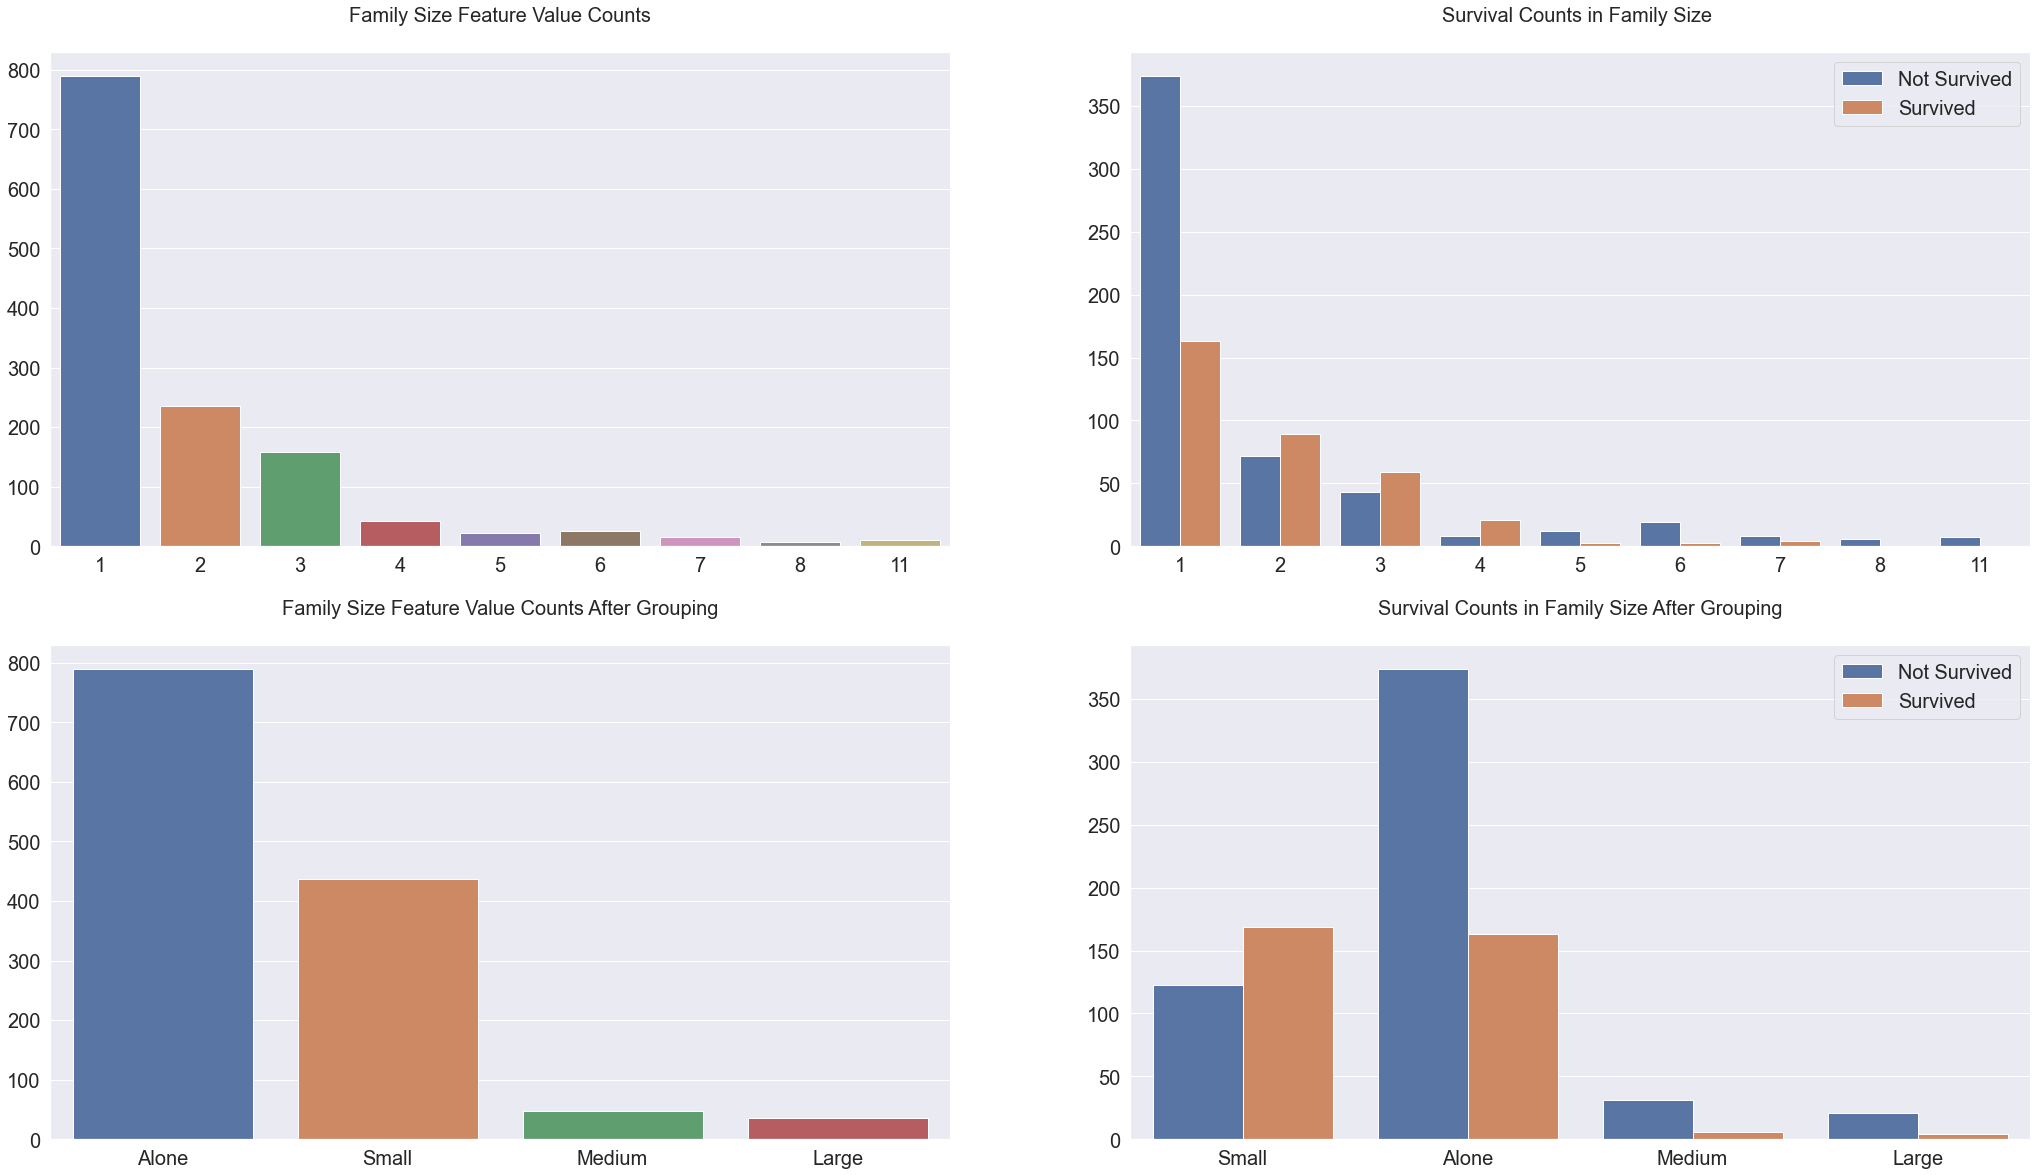

In [31]:
import matplotlib.pyplot as plt

# membuat fitur Family Size
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

# gambarkan plotnya
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

# kategori untuk menentukan kelompok keluarga berdasarkan family size
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
# Fitur Family_Size_Grouped
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

# gambarkan plotnya
sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

melihat distinct dari family size

In [32]:
df_all['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

orang dengan Family_Size 2,3,4 mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinan menurun

buat feature baru bernama Ticket_Frequency dengan nilai gabungan dari Ticket yang sama

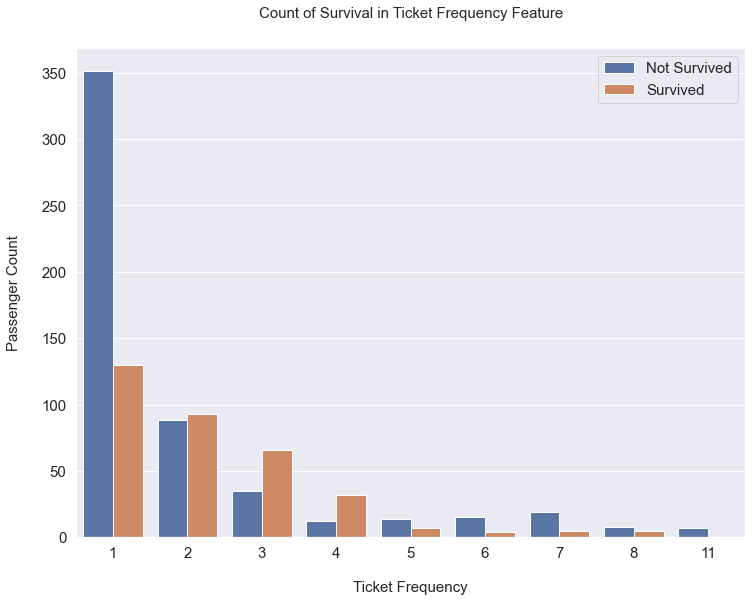

In [33]:
import matplotlib.pyplot as plt
# buat Fitur Ticket Frequency dengan menghitung hasil dari grouping pada kolom Ticket
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')


fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

dapat diasumsikan kalau ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga

sehingga hasilnya beda dengan Family_Size_Grouped

In [35]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


terdapat pola yang sama pada nama orang yang ada di dataset yaitu Nama_belakang, Jabatan. Nama_depan

maka mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik)

In [36]:
# menggunakan .split() untuk membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index []
df_all['Title'] = df_all['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]
df_all['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

- ambil index 0 alias yang pertama sehingga akan mendapatkan Mr
- kemudian membuat fitur baru dengan nama ‘Title’ yang berisi jabatan seseorang
    - seperti Mr, Mrs. , dan Miss agar bisa mengetahui status menikahnya

membuat fitur baru lagi yaitu ‘Is_Married’

jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah

In [38]:
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

df_all[['Title','Is_Married']]

,Title,Is_Married
0,Mr,0
1,Mrs,0
2,Miss,0
3,Mrs,0
4,Mr,0
...,...,...
1304,Mr,0
1305,Dona,0
1306,Mr,0
1307,Mr,0


mengubah ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan kita ubah menjadi 'Miss/Mrs/Ms' ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'

In [39]:
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

membuat plot yang menampilkan data jabatan penumpang

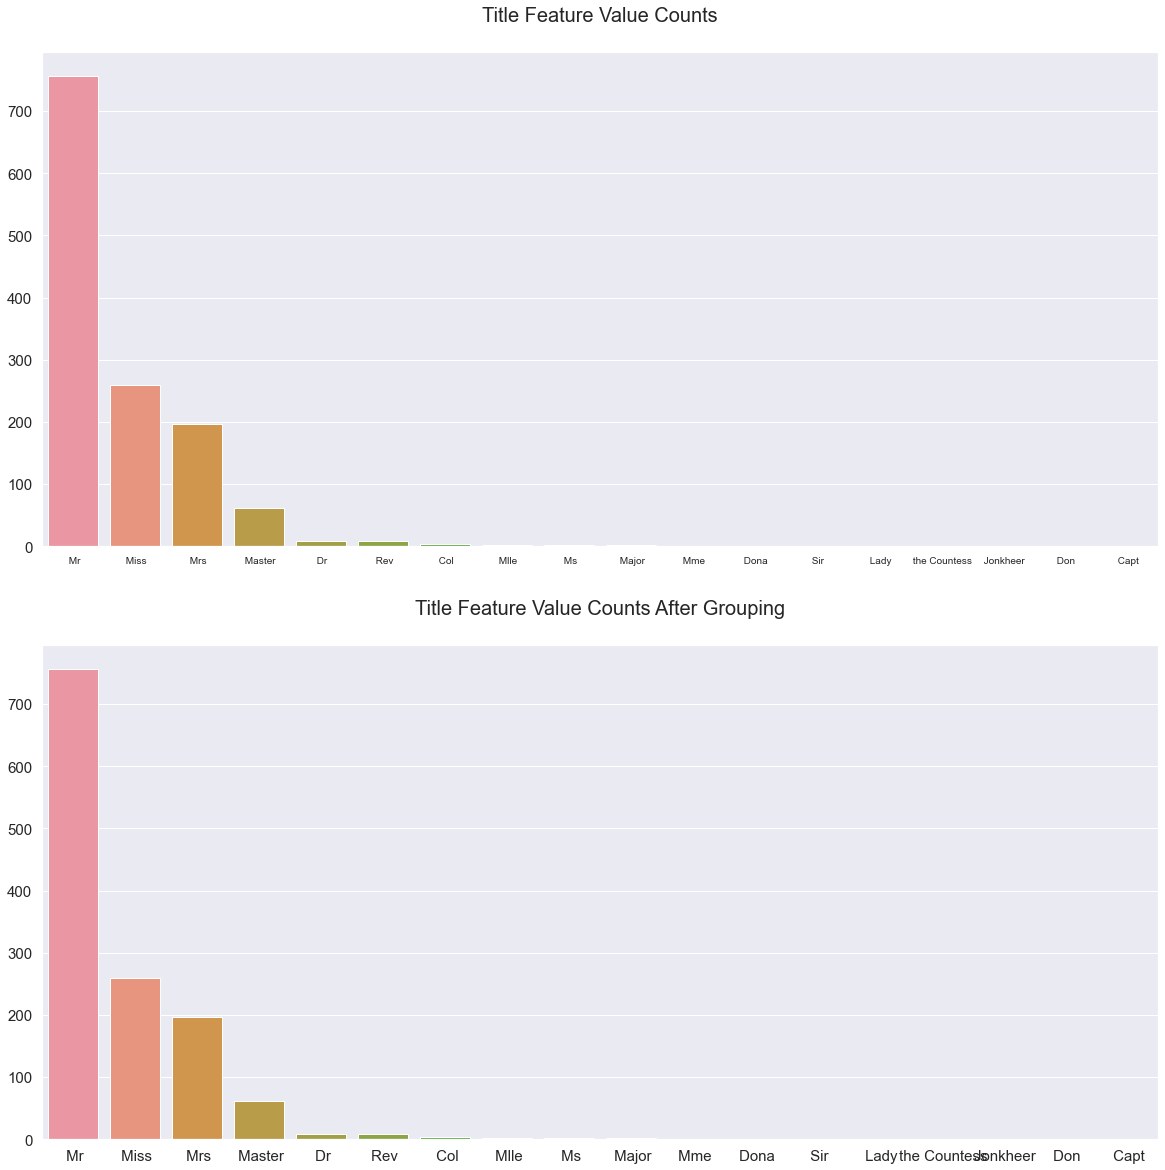

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
	axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

### Final Check

In [41]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Mrs,0
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Mrs,0
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


## Modelling

### Modelling dengan hasil Feature Engineering
untuk menaikan akurasi

In [44]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

# membagi kembali dataset kita menjadi train dan test
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

# LabelEncoder untuk data” yang bersifat non-numeric
for df in dfs:
    for feature in non_numeric_features:        
        # melakukan encoding [0-n] untuk data kategorikal
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

# mengubah feature kategori menjadi one hot, dengan OneHotEncoder
for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        # menghasilkan beberapa kolom tergantung banyaknya kategori
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

drop kolom-kolom yang tidak diperlukan, atau yang sudah diencode sebelumnya

In [42]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

KeyError: "['Title'] not found in axis"

membagi train dan test pada

In [ ]:
# train pada fitur
x_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
# train pada target
y_train = df_train['Survived'].values
# test pada fitur
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

Modelling dengan Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(criterion='gini',
                                       n_estimators = 1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

menghitung akurasi menggunakan cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring='accuracy')

print('Scores :', scores)
print('Mean :', scores.mean())
print('Standard Deviation :', scores.std())

### Modelling tanpa hasil Feature Engineering
modelling lagi tanpa menyertakan fitur yang sudah kita buat

In [ ]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

Modelling dengan Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(criterion='gini',
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

menghitung akurasi menggunakan cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Feature Engineering membuat banyak ide fitur dari data yang sudah ada

Biasanya penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi